In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this dataset if for badminton review
review1 = pd.read_csv("data.csv")
review1.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [3]:
review1.shape

(8518, 8)

In [4]:
review1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [5]:
review1.duplicated().sum()

4

In [6]:
review1.drop_duplicates(inplace=True)

In [7]:
review1.duplicated().sum()

0

In [8]:
review1.isna().sum()

Reviewer Name        6
Review Title         6
Place of Review     46
Up Votes             6
Down Votes           6
Month              461
Review text          4
Ratings              0
dtype: int64

In [9]:
# review1.dropna(inplace=True)

In [10]:
# review1.isna().sum()

In [11]:
def assign_ratings(ratings):
    if ratings == 5 or ratings == 4:
        return "Positive"
    else:
        return "Negative"


review1["Target"]=review1["Ratings"].apply(assign_ratings)

In [12]:
review1.Target.value_counts()

Target
Positive    6825
Negative    1689
Name: count, dtype: int64

In [13]:
cleaned_df = review1[['Review text', 'Target']]

In [14]:
cleaned_df.duplicated().sum()

3458

In [15]:
cleaned_df.drop_duplicates(inplace=True)

C:\Users\Manisha\AppData\Local\Temp\ipykernel_16840\181483249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop_duplicates(inplace=True)


In [16]:
cleaned_df.duplicated().sum()

0

In [17]:
cleaned_df.isna().sum()

Review text    2
Target         0
dtype: int64

In [18]:
cleaned_df.dropna(inplace=True)

C:\Users\Manisha\AppData\Local\Temp\ipykernel_16840\3584568400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(inplace=True)


In [19]:
cleaned_df.isna().sum()

Review text    0
Target         0
dtype: int64

In [20]:
cleaned_df.shape

(5054, 2)

In [21]:
cleaned_df.head()

,Review text,Target
0,"Nice product, good quality, but price is now r...",Positive
1,They didn't supplied Yonex Mavis 350. Outside ...,Negative
2,Worst product. Damaged shuttlecocks packed in ...,Negative
3,"Quite O. K. , but nowadays the quality of the...",Negative
4,Over pricedJust â?¹620 ..from retailer.I didn'...,Negative


In [22]:
cleaned_df['target']=cleaned_df['Target'].map({'Positive':1,'Negative':0})

C:\Users\Manisha\AppData\Local\Temp\ipykernel_16840\2359280761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['target']=cleaned_df['Target'].map({'Positive':1,'Negative':0})


In [23]:
x=cleaned_df['Review text']
y=cleaned_df['target']

In [24]:
y.value_counts()

target
1    3716
0    1338
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4043,)
(1011,)
(4043,)
(1011,)


In [27]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Bidirectional, LSTM, Dense, GRU

In [28]:
# Tokenization
max_words = 5000
max_len = 50
tokenizer = Tokenizer(num_words=max_words, oov_token='<oov>')

In [29]:
tokenizer.fit_on_texts(x_train)

In [30]:
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [31]:
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post')

In [32]:
x_train_pad.shape

(4043, 50)

### SimpleRNN

**Sequential**

Creates a sequential model, meaning layers will be added one after the other.

**Embedding Layer**

Converts each word index into a dense vector of size 64.

input_dim=max_words: Vocabulary size (only the top max_words are considered).

output_dim=64: Dimension of each word embedding.

input_length=max_len: The length of input sequences (ensures the network knows how long each input will be).

Example: "good product" → [12, 98] → embedding → [ [0.12, 0.45,...], [0.87, 0.65,...] ]

**SimpleRNN Layer**

Reads the sequence word by word and maintains a hidden state.

64: Number of hidden units.

return_sequences=False: Only output the last hidden state (good for classification).

If you set return_sequences=True, it would output the hidden state for every time step (useful for sequence-to-sequence tasks).

                                                                                        
**Fully Connected Dense Layer**

Takes the RNN’s output and learns more abstract representations.

32 neurons with ReLU activation help capture non-linear patterns.

**Output Layer**

Since this is a binary classification (Positive vs Negative), you need 1 output neuron.

sigmoid gives a probability between 0 and 1.

Output > 0.5 → Positive, else Negative.
                                                                                        

### Storing loss and accuracy

In [33]:
Loss=[]
Accuracy=[]

In [34]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=64,input_length=max_len))
model.add(SimpleRNN(64, return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Manisha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 50, 64)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 330,369 (1.26 MB)

 Trainable params: 330,369 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=16, validation_data=(x_test_pad, y_test))

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.7349 - loss: 0.5851 - val_accuracy: 0.7290 - val_loss: 0.6279
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7313 - loss: 0.5691 - val_accuracy: 0.7290 - val_loss: 0.5375
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7437 - loss: 0.4963 - val_accuracy: 0.7458 - val_loss: 0.5244
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7829 - loss: 0.4450 - val_accuracy: 0.7082 - val_loss: 0.5385
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8213 - loss: 0.4032 - val_accuracy: 0.7418 - val_loss: 0.5403


In [38]:
loss, accuracy = model.evaluate(x_test_pad, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7421 - loss: 0.5468


In [39]:
Loss.append(loss)
Accuracy.append(accuracy)

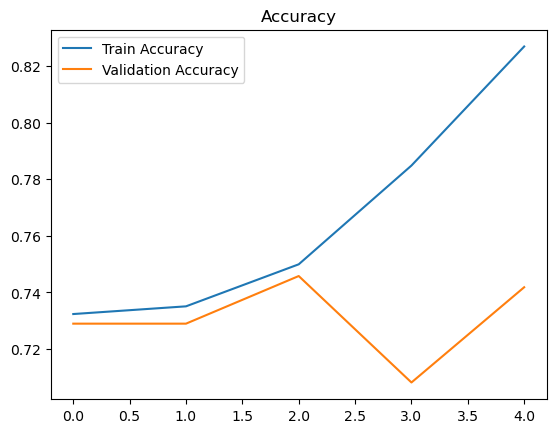

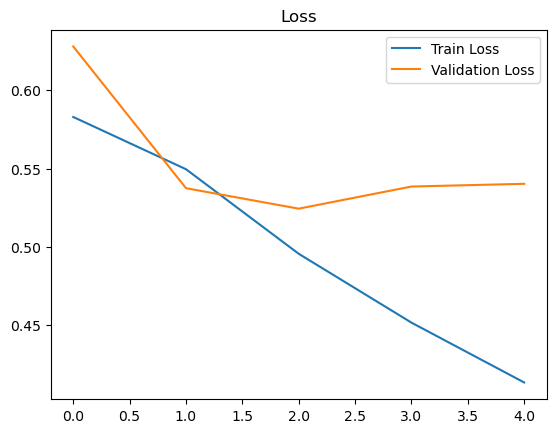

In [40]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### Bidirectional RNN

In [41]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=64,input_length=max_len))
model.add(Bidirectional(SimpleRNN(64, return_sequences=False)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 50, 64)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 340,673 (1.30 MB)

 Trainable params: 340,673 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=16, validation_data=(x_test_pad, y_test))

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.7391 - loss: 0.5411 - val_accuracy: 0.8615 - val_loss: 0.3554
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8993 - loss: 0.2852 - val_accuracy: 0.8724 - val_loss: 0.3267
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9318 - loss: 0.1960 - val_accuracy: 0.8773 - val_loss: 0.3286
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9563 - loss: 0.1312 - val_accuracy: 0.8665 - val_loss: 0.3732
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9656 - loss: 0.0969 - val_accuracy: 0.8546 - val_loss: 0.4350


In [45]:
loss, accuracy = model.evaluate(x_test_pad, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8490 - loss: 0.4324


In [46]:
Loss.append(loss)
Accuracy.append(accuracy)

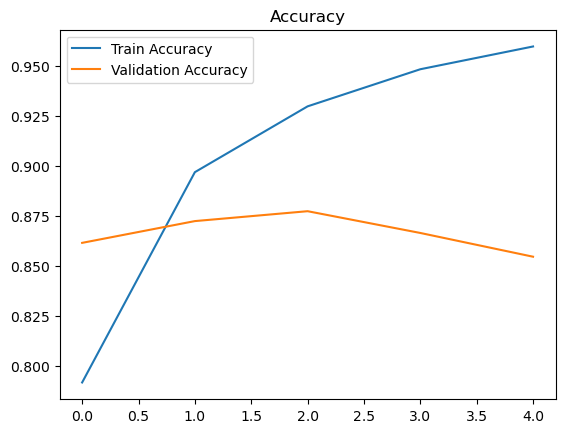

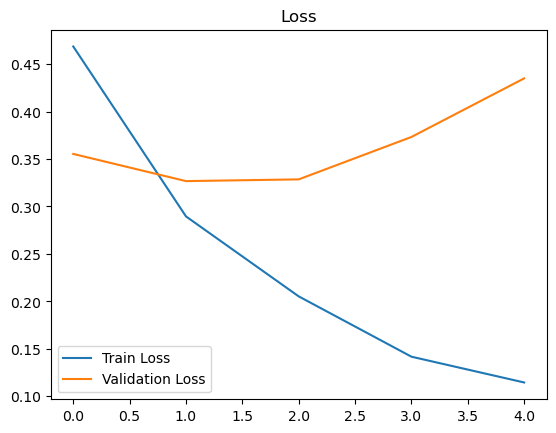

In [47]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### LSTM

In [48]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=64,input_length=max_len))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 50, 64)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,137 (1.35 MB)

 Trainable params: 355,137 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=16, validation_data=(x_test_pad, y_test))

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.7264 - loss: 0.5971 - val_accuracy: 0.7972 - val_loss: 0.4855
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8102 - loss: 0.4692 - val_accuracy: 0.7864 - val_loss: 0.4613
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8116 - loss: 0.4331 - val_accuracy: 0.8190 - val_loss: 0.4479
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8433 - loss: 0.4078 - val_accuracy: 0.8269 - val_loss: 0.4433
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7724 - loss: 0.4622 - val_accuracy: 0.7290 - val_loss: 0.5843


In [52]:
loss, accuracy = model.evaluate(x_test_pad, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7125 - loss: 0.6011


In [53]:
Loss.append(loss)
Accuracy.append(accuracy)

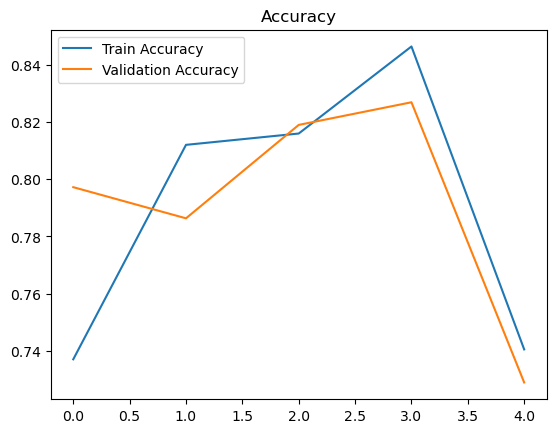

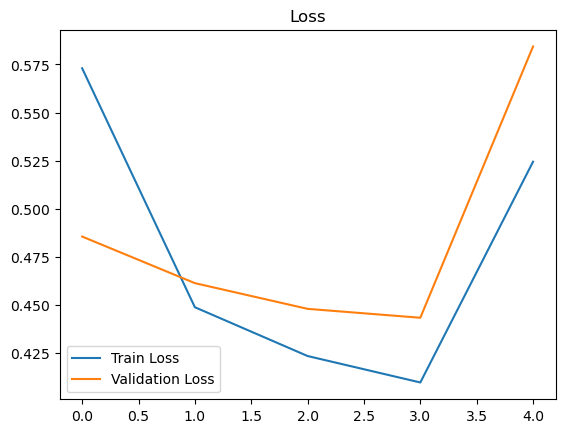

In [54]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### Bidirectional LSTM

In [55]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=64,input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 50, 64)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390,209 (1.49 MB)

 Trainable params: 390,209 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=16, validation_data=(x_test_pad, y_test))

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.7788 - loss: 0.5092 - val_accuracy: 0.8734 - val_loss: 0.3356
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8938 - loss: 0.2799 - val_accuracy: 0.8823 - val_loss: 0.3113
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9339 - loss: 0.1995 - val_accuracy: 0.8734 - val_loss: 0.3350
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9517 - loss: 0.1605 - val_accuracy: 0.8516 - val_loss: 0.3505
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9539 - loss: 0.1463 - val_accuracy: 0.8427 - val_loss: 0.4175


In [59]:
loss, accuracy = model.evaluate(x_test_pad, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8326 - loss: 0.4239


In [60]:
Loss.append(loss)
Accuracy.append(accuracy)

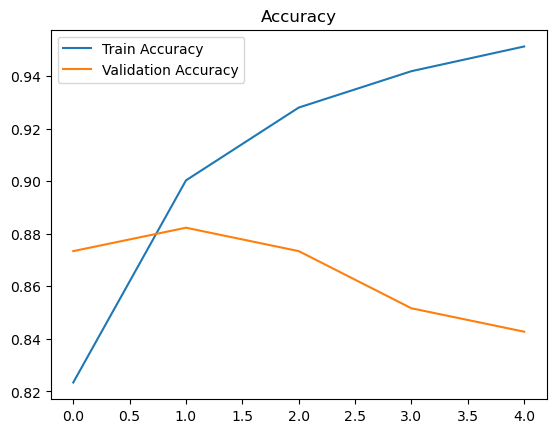

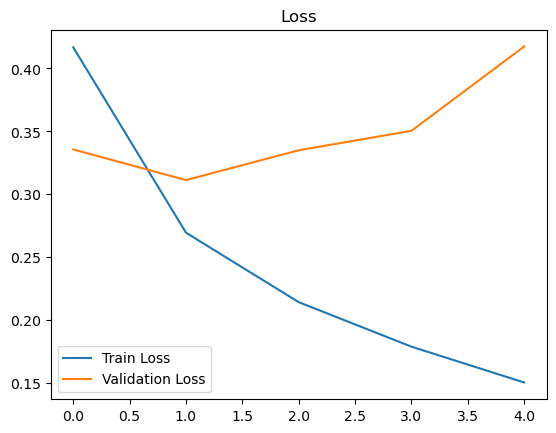

In [61]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### GRU (Gated Recurrent Unit)

In [62]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=64,input_length=max_len))
model.add(GRU(64, return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 50, 64)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,073 (1.32 MB)

 Trainable params: 347,073 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=16, validation_data=(x_test_pad, y_test))

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.7235 - loss: 0.5973 - val_accuracy: 0.7290 - val_loss: 0.5970
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7476 - loss: 0.5674 - val_accuracy: 0.7260 - val_loss: 0.5900
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7495 - loss: 0.5656 - val_accuracy: 0.8635 - val_loss: 0.3468
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8847 - loss: 0.3011 - val_accuracy: 0.8882 - val_loss: 0.3127
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9233 - loss: 0.2305 - val_accuracy: 0.8744 - val_loss: 0.3177


In [66]:
loss, accuracy = model.evaluate(x_test_pad, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8762 - loss: 0.3050


In [67]:
Loss.append(loss)
Accuracy.append(accuracy)

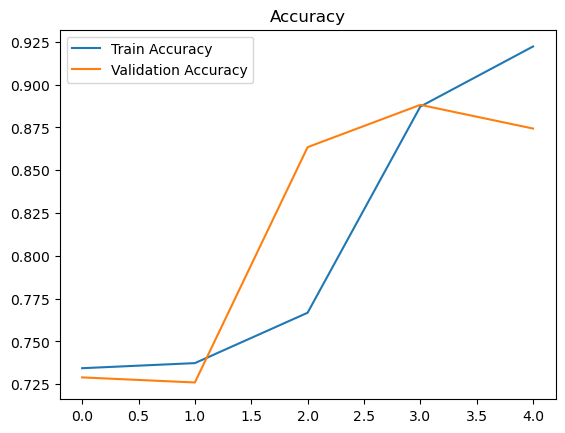

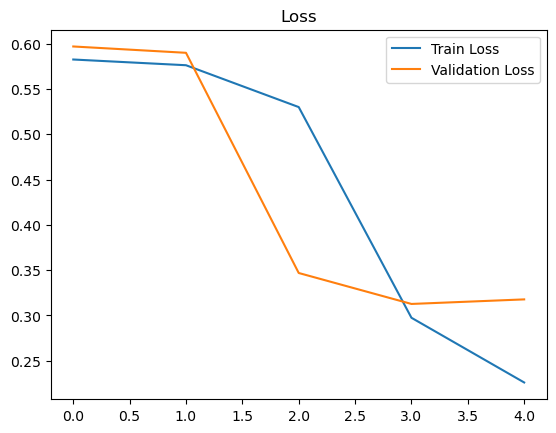

In [68]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### Bidirectional GRU

In [69]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=64,input_length=max_len))
model.add(Bidirectional(GRU(64, return_sequences=False)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [70]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 50, 64)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 128)                 │          49,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 374,081 (1.43 MB)

 Trainable params: 374,081 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=16, validation_data=(x_test_pad, y_test))

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.7888 - loss: 0.4935 - val_accuracy: 0.8684 - val_loss: 0.3399
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9099 - loss: 0.2697 - val_accuracy: 0.8773 - val_loss: 0.3300
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9283 - loss: 0.2081 - val_accuracy: 0.8477 - val_loss: 0.3525
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9502 - loss: 0.1597 - val_accuracy: 0.8684 - val_loss: 0.3871
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9550 - loss: 0.1357 - val_accuracy: 0.8526 - val_loss: 0.4380


In [73]:
loss, accuracy = model.evaluate(x_test_pad, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8526 - loss: 0.4162


In [74]:
Loss.append(loss)
Accuracy.append(accuracy)

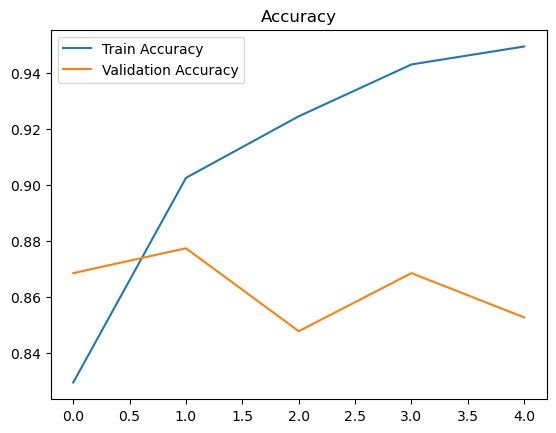

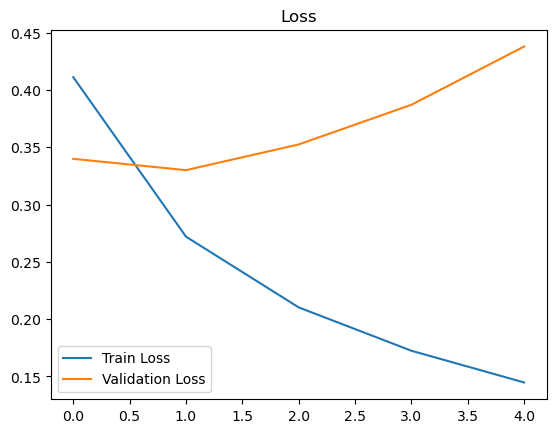

In [75]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [76]:
print(Accuracy)
print(Loss)

[0.7418397665023804, 0.8545994162559509, 0.7289811968803406, 0.8427299857139587, 0.8743817806243896, 0.8526211380958557]
[0.5402624011039734, 0.4350009262561798, 0.5843473076820374, 0.4174557030200958, 0.31769949197769165, 0.43796849250793457]


In [77]:
dic={'accu':Accuracy, 'loss':Loss}

In [78]:
import pandas as pd
labels=['RNN', 'BRNN', 'LSTM', 'BLSTM', 'GRU', 'BGRU']
df=pd.DataFrame(dic, index=labels)


In [79]:
df

,accu,loss
RNN,0.741840,0.540262
BRNN,0.854599,0.435001
LSTM,0.728981,0.584347
BLSTM,0.842730,0.417456
GRU,0.874382,0.317699
BGRU,0.852621,0.437968


In [80]:
model.save("sentiment_gru_model.h5")

import joblib
# tokenizer
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

In [81]:
from tensorflow.keras.models import load_model

model = load_model("sentiment_gru_model.h5")

tokenizer = joblib.load("tokenizer.pkl")

max_len = 50 

In [82]:
review1 = ["This product is amazing and totally worth the price"]
seq = tokenizer.texts_to_sequences(review1)

padded = pad_sequences(seq, maxlen=max_len, padding='post')

In [83]:
prediction = model.predict(padded)
print(prediction[0][0])
if prediction>=0.5:
    print("Positive")
else:
    print("Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
0.9834015
Positive
